# Actividad 1: Regresion lineal simple/Multiple

> Alfonso Pineda Cedillo | A01660394  
Mariana Rincón Flores | A01654973  
Salvador Mendoza Tinoco | A01067783  
Karla González Sánchez | A01541526

**Fecha de entrega:** 6 de Octubre de 2023

---


## Modelo de Regresión Lineal Simple

La regresión lineal simple es una técnica fundamental en el campo de la estadística y el análisis de datos que se utiliza para modelar la relación entre dos variables, una variable independiente (predictora) y una variable dependiente (objetivo). Su objetivo principal es establecer una relación lineal entre estas dos variables y, a través de esta relación, hacer predicciones o inferencias sobre el valor de la variable dependiente en función de la variable independiente.

En términos más simples, la regresión lineal simple busca responder preguntas como "¿Cómo afecta un cambio en una variable a otra?" o "¿Cuál es el impacto de una variable en la variable que estamos estudiando?". Esta técnica es especialmente útil cuando se busca comprender y predecir relaciones entre variables cuantitativas.

### Exploración de los datos

La exploración de los datos es una fase crítica en cualquier análisis de datos y modelado estadístico, incluyendo la regresión lineal simple. Antes de embarcarnos en la construcción de un modelo, es esencial comprender la naturaleza y las características de los datos con los que estamos trabajando. Esta fase nos permite obtener información valiosa sobre las relaciones, patrones y distribuciones de las variables involucradas, lo que, a su vez, nos ayuda a tomar decisiones fundamentadas en el proceso de modelado.

En esta sección, importaremos las librerías necesarias para el desarrollo de la actividad y exploraremos los datos que utilizaremos para construir nuestros modelos de regresión lineal. Para ello, utilizaremos la biblioteca Pandas de Python, que nos permite leer y manipular fácilmente los datos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.graphics.gofplots as smqq
from scipy.stats import norm, uniform, skewnorm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mi#data = pd.read_csv('CO2 Emissions_Canada.csv')
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Est2/archive/CO2 Emissions_Canada.csv")

In [ ]:
data.shape

(7385, 12)

In [ ]:
data.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [ ]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
data.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


### Elaboración del modelo

A continuación, llevamos a cabo un análisis de regresión lineal simple y la visualización de los parámetros y el coeficiente de determinación ($R^2$) del modelo en un conjunto de datos. El objetivo principal es evaluar la relación entre cada variable independiente (representada por nuestro arreglo "variables") y la variable dependiente "`CO2 Emissions(g/km)`".


In [ ]:
# Lista de variables a considerar
variables = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
             'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
             'Fuel Consumption Comb (mpg)']


Parámetros para Engine Size(L):
   Beta0: 134.36589272349488
   Beta1: 36.777315186419465
R² para Engine Size(L): 0.7244

Parámetros para Cylinders:
   Beta0: 100.9569146937145
   Beta1: 26.64772433469787
R² para Cylinders: 0.6933

Parámetros para Fuel Consumption City (L/100 km):
   Beta0: 57.55990260166197
   Beta1: 15.372458959201197
R² para Fuel Consumption City (L/100 km): 0.8457

Parámetros para Fuel Consumption Hwy (L/100 km):
   Beta0: 40.44858137039251
   Beta1: 23.24075938747174
R² para Fuel Consumption Hwy (L/100 km): 0.7806

Parámetros para Fuel Consumption Comb (L/100 km):
   Beta0: 46.7631522174966
   Beta1: 18.5713190214271
R² para Fuel Consumption Comb (L/100 km): 0.8428

Parámetros para Fuel Consumption Comb (mpg):
   Beta0: 452.35303635354416
   Beta1: -7.341928995382786
R² para Fuel Consumption Comb (mpg): 0.8234



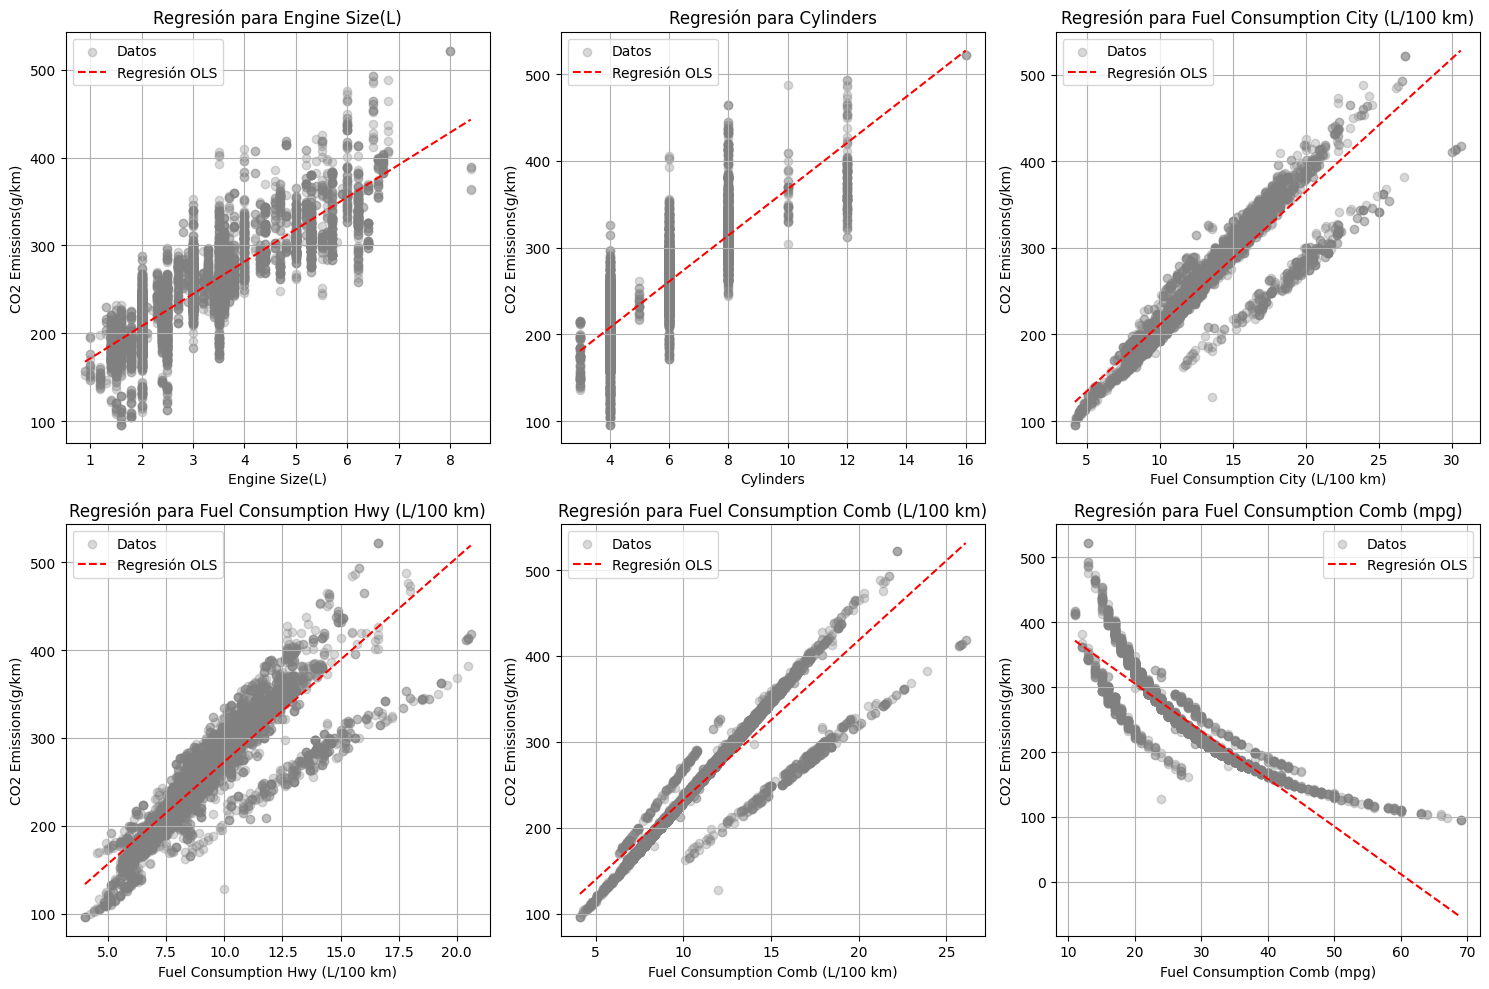

In [ ]:
# Creamos un subplot con múltiples gráficas en dos filas y tres columnas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Ciclo for para ajustar el modelo, imprimir R² y graficar la regresión para cada variable
for i, variable in enumerate(variables):
    row = i // 3  # Fila actual (0 o 1)
    col = i % 3   # Columna actual (0, 1 o 2)

    x = data[variable].values
    y = data['CO2 Emissions(g/km)'].values

    # Agregamos constante
    x_train = sm.add_constant(x)

    # Generamos el modelo
    model = sm.OLS(y, x_train)
    result = model.fit()

    # Generamos los valores para la línea de regresión
    X_range = np.linspace(x_train[:, 1].min(), x_train[:, 1].max(), 100)
    X_range = sm.add_constant(X_range)

    # Calculamos los valores predichos para la línea de regresión
    Y_pred = result.predict(X_range)

    # Graficamos los datos dispersos en el subplot correspondiente
    axes[row, col].scatter(x_train[:, 1], y, label="Datos", color='gray', alpha=0.3)

    # Graficamos la línea de regresión en el subplot correspondiente
    axes[row, col].plot(X_range[:, 1], Y_pred, color='red', label="Regresión OLS", linestyle='--')

    axes[row, col].grid()
    axes[row, col].set_xlabel(variable)
    axes[row, col].set_ylabel('CO2 Emissions(g/km)')
    axes[row, col].set_title(f'Regresión para {variable}')
    axes[row, col].legend()

    # Imprimimos el valor de R² para el modelo actual
    r_squared = result.rsquared
    params = result.params
    print(f"Parámetros para {variable}:")
    print(f"   Beta0: {params[0]}")
    print(f"   Beta1: {params[1]}")
    print(f"R² para {variable}: {r_squared:.4f}\n")

# Ajustamos el espaciado entre subplots
plt.tight_layout()

# Mostramos el figure con todas las gráficas
plt.show()

**Preguntas:**

1. **Determinar o comprobar la influencia de distintas variables en la emisión de CO2.**  
   - $R^2$ para `Engine Size(L)`: $0.7244$  
   - $R^2$ para `Cylinders`: $0.6933$  
   - $R^2$ para `Fuel Consumption City (L/100 km)`: $0.8457$
   - $R^2$ para `Fuel Consumption Hwy (L/100 km)`: $0.7806$
   - $R^2$ para `Fuel Consumption Comb (L/100 km)`: $0.8428$
   - $R^2$ para `Fuel Consumption Comb (mpg)`: $0.8234$

2. **¿Cuáles son las características que más influyen en la emisión de CO2?**  
`Fuel Consumption City (L/100 km)` con un $R^2$ de $0.8457$ y `Fuel Consumption Comb (L/100 km)` con un $R^2$ de $0.8428$

3. **¿Habrá alguna diferencia en las emisiones de CO2 cuando el consumo de combustible para ciudad y carretera se consideren por separado?**  
de acuerdo con los valores de $R^2$ obtenidos, tanto el consumo de combustible para ciudad como para carretera son importantes para predecir las emisiones de CO2, y sus modelos son bastante efectivos. Sin embargo, el consumo de combustible combinado (ciudad y carretera) también es un buen predictor y tiene un poder predictivo similar o incluso ligeramente mejor en comparación con las otras variables. Por lo tanto, tener en cuenta tanto el consumo de combustible para ciudad como para carretera puede proporcionar una imagen más completa de cómo afecta el consumo de combustible a las emisiones de CO2.

### Visualización de Residuos Estandarizados

Realizamos la visualización de los errores estandarizados respecto a la variable de respuesta `CO2 Emissions(g/km)`. Estos errores estandarizados representan las diferencias entre los valores observados y los valores predichos por el modelo de regresión lineal para cada punto de datos en relación con la variable independiente de interés, en este caso, `Fuel Consumption City (L/100 km).`

Las gráficas de error, también conocidas como gráficas de "Predicho vs. Residuo std" o "Residual plots", desempeñan un papel esencial en el análisis de regresión lineal y son herramientas valiosas para evaluar la validez de un modelo. Estas gráficas son especialmente útiles en el contexto de la regresión lineal simple y múltiple, y su utilidad radica en los siguientes aspectos:

   1. **Identificación de patrones no lineales:** Las gráficas de error permiten detectar patrones no lineales en los residuos. Cuando se ajusta un modelo de regresión lineal, se asume una relación lineal entre las variables independientes y la variable dependiente. Si los residuos exhiben patrones curvilíneos o no lineales en la gráfica, esto sugiere que el modelo puede ser inadecuado y que es necesario considerar formas funcionales más complejas para la relación.

   2. **Detección de valores atípicos:** Las gráficas de error también permiten detectar valores atípicos en los residuos. Los valores atípicos son valores inusuales que pueden afectar negativamente el modelo. Por lo tanto, al identificar estos valores atípicos en la gráfica de error, se pueden tomar decisiones sobre si deben ser tratados o excluidos en el análisis.

   3. **Evaluación de la homocedasticidad:** Las gráficas de error también se pueden utilizar para evaluar la homocedasticidad de los residuos. La homocedasticidad se refiere a la igualdad de varianzas de los residuos. En el contexto de la regresión lineal, la homocedasticidad implica que los residuos tienen una varianza constante a lo largo de la línea de regresión. Si los residuos tienen una varianza no constante (es decir, varianza heterocedástica), esto puede indicar que el modelo no es adecuado y que es necesario considerar otras formas funcionales para la relación, por lo tanto, una dispersión uniforme indica que el modelo de regresión lineal es apropiado.

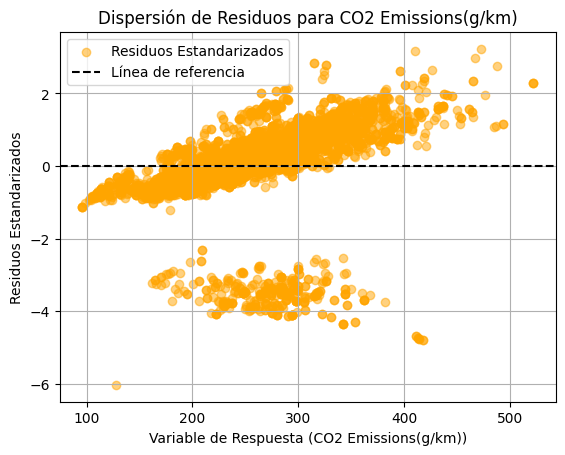

In [ ]:
# Variable de respuesta
y = data['CO2 Emissions(g/km)'].values

# Variable independiente de interés
variable = 'Fuel Consumption City (L/100 km)'

# Ajustamos el modelo
x = data[variable].values
x = sm.add_constant(x)
model = sm.OLS(y, x)
result = model.fit()

# Calculamos los residuos estandarizados
influence = result.get_influence()
standarized_residuals = influence.resid_studentized_internal

# Graficamos la dispersión de los residuos estandarizados
plt.scatter(y, standarized_residuals, label="Residuos Estandarizados", color='orange', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', label='Línea de referencia')

plt.grid()
plt.xlabel('Variable de Respuesta (CO2 Emissions(g/km))')
plt.ylabel('Residuos Estandarizados')
plt.title(f'Dispersión de Residuos para CO2 Emissions(g/km)')
plt.legend()

# Mostramos la gráfica
plt.show()


### QQ - Plot
Las gráficas de error QQ-Plot (Quantile-Quantile Plot) son una herramienta poderosa en el análisis de regresión y en la evaluación de la normalidad de los residuos de un modelo. Estas gráficas comparan la distribución de los residuos con la distribución teórica que se está evaluando, como la distribución normal, uniforme o cualquier otra distribución específica. A continuación, se muestra el código correspondiente de las gráficas de error QQ-Plot para tres distribuciones específicas: Normal, Uniform y Skewnorm.

**Distribución `Skewnorm`**

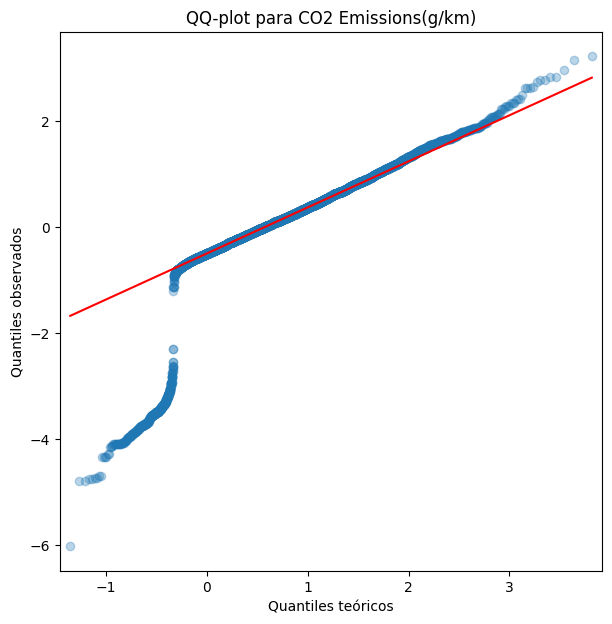

In [ ]:
# Variable de respuesta
y = data['CO2 Emissions(g/km)'].values

# Creamos una figura para el QQ-plot
fig, ax = plt.subplots(figsize=(7, 7))

# Ajustamos el modelo
x = sm.add_constant(x)
model = sm.OLS(y, x)
result = model.fit()

# Calculamos los residuos estandarizados
influence = result.get_influence()
standarized_residuals = influence.resid_studentized_internal

# Generamos el QQ-plot con respecto a 'y'
smqq.qqplot(standarized_residuals, dist=skewnorm(2), line='q', ax=ax, alpha=0.3)
ax.set_xlabel('Quantiles teóricos')
ax.set_ylabel('Quantiles observados')
ax.set_title('QQ-plot para CO2 Emissions(g/km)')

# Mostramos el QQ-plot
plt.show()

**Distribución `Norm`**

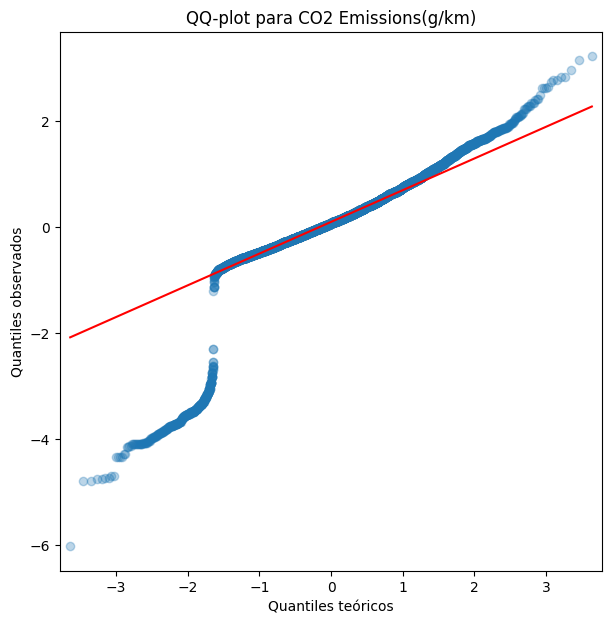

In [ ]:
# Variable de respuesta
y = data['CO2 Emissions(g/km)'].values

# Creamos una figura para el QQ-plot
fig, ax = plt.subplots(figsize=(7, 7))

# Ajustamos el modelo
x = sm.add_constant(x)
model = sm.OLS(y, x)
result = model.fit()

# Calculamos los residuos estandarizados
influence = result.get_influence()
standarized_residuals = influence.resid_studentized_internal

# Generamos el QQ-plot con respecto a 'y'
smqq.qqplot(standarized_residuals, dist=norm, line='q', ax=ax, alpha=0.3)
ax.set_xlabel('Quantiles teóricos')
ax.set_ylabel('Quantiles observados')
ax.set_title('QQ-plot para CO2 Emissions(g/km)')

# Mostramos el QQ-plot
plt.show()

**Distribución `Uniform`**

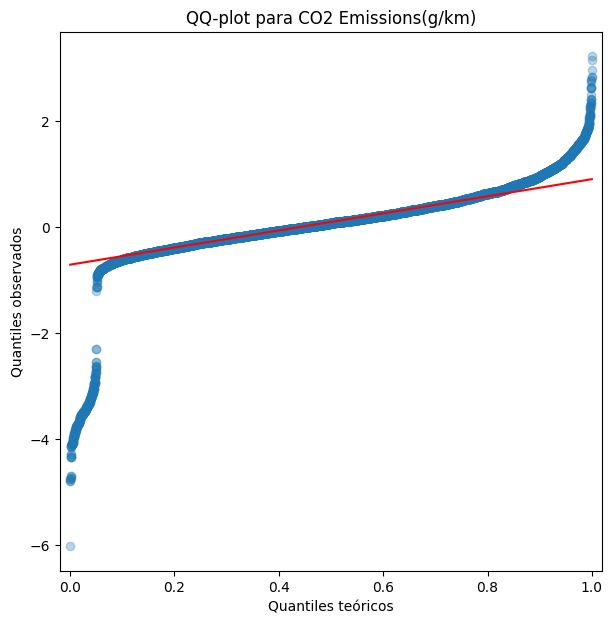

In [ ]:
variables = ['Fuel Consumption City (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Engine Size(L)']
x = data[variable].values

# Variable de respuesta
y = data['CO2 Emissions(g/km)'].values

# Creamos una figura para el QQ-plot
fig, ax = plt.subplots(figsize=(7, 7))

# Ajustamos el modelo
x = sm.add_constant(x)
model = sm.OLS(y, x)
result = model.fit()

# Calculamos los residuos estandarizados
influence = result.get_influence()
standarized_residuals = influence.resid_studentized_internal

# Generamos el QQ-plot con respecto a 'y'
smqq.qqplot(standarized_residuals, dist=uniform, line='q', ax=ax, alpha=0.3)
ax.set_xlabel('Quantiles teóricos')
ax.set_ylabel('Quantiles observados')
ax.set_title('QQ-plot para CO2 Emissions(g/km)')

# Mostramos el QQ-plot
plt.show()

De las tres distribuciones, la que mejor se ajusta a los errores es la Uniforme, ya que los puntos en el QQ-Plot siguen una línea diagonal más marcada y constante a comparación de las otras distribuciones, donde podemos ver como en los extremos de la línea, los puntos divergen de la misma.

### Histogramas de distribución de los datos

En el siguiente gráfico se muetra el histograma de los datos estandarizados, mostrando su distribución y superponiendo una curva de distribución normal ajustada a los datos.

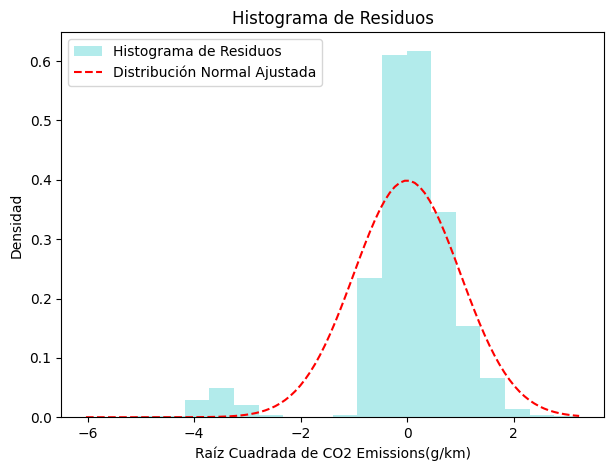

In [ ]:
# Variable de respuesta
y = data['CO2 Emissions(g/km)'].values

# Creamos una figura para el histograma de residuos transformados
fig, ax = plt.subplots(figsize=(7, 5))

# Ajustamos el modelo
x = sm.add_constant(x)
model = sm.OLS(y, x)
result = model.fit()

# Calculamos los residuos estandarizados
influence = result.get_influence()
standarized_residuals = influence.resid_studentized_internal

# Histograma de los residuos con respecto a 'y'
ax.hist(standarized_residuals, bins=20, density=True, color='c', alpha=0.3, label='Histograma de Residuos')

# Ajuste de una distribución normal a los datos
mu, sigma = stats.norm.fit(standarized_residuals)
x_fit = np.linspace(min(standarized_residuals), max(standarized_residuals), 100)
pdf = stats.norm.pdf(x_fit, mu, sigma)

# Graficamos la distribución
ax.plot(x_fit, pdf, color='red', linestyle='--', label='Distribución Normal Ajustada')
ax.set_xlabel('Raíz Cuadrada de CO2 Emissions(g/km)')
ax.set_ylabel('Densidad')
ax.set_title('Histograma de Residuos')
ax.legend()

# Mostramos el histograma
plt.show()

En este caso, se aplica una transformación logarítmica a estos residuos estandarizados, ya que la distribución tiene una asimetría negativa. Con objetivo de mejorar la normalidad de los residuos, el código luego muestra un histograma de los residuos transformados y ajusta una curva de distribución normal a los datos transformados. Se puede ver que con la transformación aplicada, se ajusta mejor a una distribución normal (en forma de campana) de los residuos a comparación del modelo original.

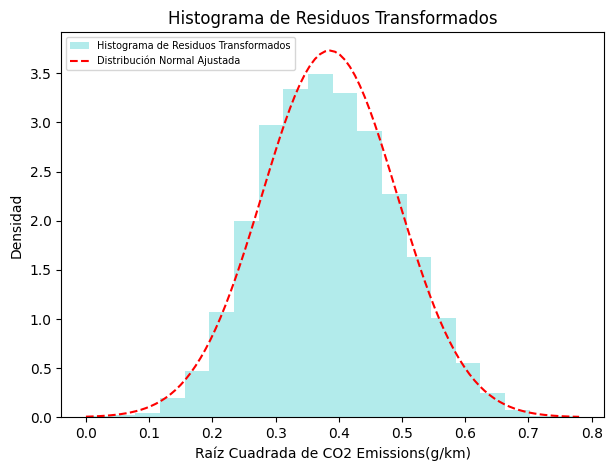

In [ ]:
# Variable de respuesta
y = data['CO2 Emissions(g/km)'].values

# Creamos una figura para el histograma de residuos transformados
fig, ax = plt.subplots(figsize=(7, 5))

# Ajustamos el modelo
x = sm.add_constant(x)
model = sm.OLS(y, x)
result = model.fit()

# Calculamos los residuos estandarizados
influence = result.get_influence()
standarized_residuals = influence.resid_studentized_internal

# Aplicamos la transformación de logaritmo
r = skewnorm.rvs(-4, size=10000)
r_positive=r+abs(min(r))

log_residuals = np.log10(1 + max(r_positive) - r_positive)

# Histograma de los residuos transformados con respecto a 'y'
ax.hist(log_residuals, bins=20, density=True, color='c', alpha=0.3, label='Histograma de Residuos Transformados')

# Ajuste de una distribución normal a los datos
mu, sigma = stats.norm.fit(log_residuals)
x_fit = np.linspace(min(log_residuals), max(log_residuals), 100)
pdf = stats.norm.pdf(x_fit, mu, sigma)

# Graficamos la distribución normal ajustada
ax.plot(x_fit, pdf, color='red', linestyle='--', label='Distribución Normal Ajustada')
ax.set_xlabel('Raíz Cuadrada de CO2 Emissions(g/km)')
ax.set_ylabel('Densidad')
ax.set_title('Histograma de Residuos Transformados')
ax.legend()
plt.legend(loc='upper left', fontsize=7)
# Mostramos el histograma
plt.show()


Se calcula una nueva R-cuadrada para los datos transformados de los residuos, que se obtuvieron previamente mediante una transformación logarítmica.

Primero, se obtienen los residuos estandarizados internos del modelo ajustado. Luego, se realiza la transformación logarítmica a estos residuos y se calcula la suma de los cuadrados de los residuos transformados y de los residuos originales.

Finalmente, se calcula la nueva R-cuadrada. El resultado muestra que la R-cuadrada para los datos transformados es muy alta (aproximadamente 0.9995), lo que indica un alto grado de ajuste en el nuevo modelo después de la transformación, en comparación con el valor anterior de 0.874 en el modelo original. Esto sugiere que la transformación logarítmica mejoró significativamente la calidad del ajuste del modelo a los datos.

In [ ]:
# Residuos estandarizados
influence = result.get_influence()
standarized_residuals = influence.resid_studentized_internal
r = skewnorm.rvs(-4, size=10000)
r_positive = r + abs(min(r))
sqrt_residuals = np.log10(1 + max(r_positive) - r_positive)
sum_transformed_residuals_squared = np.sum(sqrt_residuals**2)
sum_original_residuals_squared = np.sum(result.resid**2)

# nueva R cuadrada
new_r_squared = 1 - (sum_transformed_residuals_squared / sum_original_residuals_squared)
print("R cuadrada con datos transformados:", new_r_squared)

R cuadrada con datos transformados: 0.9995748840917622


### Prueba de Hipótesis

In [ ]:
Y=data['CO2 Emissions(g/km)']
X=data[variables]
X=sm.add_constant(X)
model=sm.OLS(Y,X)
results=model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.874
Model:                             OLS   Adj. R-squared:                  0.874
Method:                  Least Squares   F-statistic:                 1.702e+04
Date:                 Sat, 07 Oct 2023   Prob (F-statistic):               0.00
Time:                         05:13:03   Log-Likelihood:                -32890.
No. Observations:                 7385   AIC:                         6.579e+04
Df Residuals:                     7381   BIC:                         6.582e+04
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

Los resultados indican que el modelo tiene un R-cuadrado de 0.874, lo que significa que aproximadamente el 87.4% de la variabilidad en la variable de respuesta `CO2 Emissions(g/km)` puede explicarse por las variables predictoras incluidas en el modelo. Se puede decir que el modelo tiene un buen ajuste a los datos.

En este caso, el coeficiente constante (intercepto) es de 61.3643, lo que significa que cuando todas las variables predictoras son cero, se espera un valor de `CO2 Emissions(g/km)` de aproximadamente 61.3643.

Los coeficientes de las variables predictoras indican que:

Por cada unidad adicional de `Fuel Consumption City (L/100 km)` aumenta la `CO2 Emissions(g/km)` en aproximadamente 1.9890 unidades.


Por cada unidad adicional de `Fuel Consumption Comb (L/100 km)` aumenta la `CO2 Emissions(g/km)` en aproximadamente 11.2699 unidades.


Por cada unidad adicional de `Engine Size (L)` aumenta la `CO2 Emissions(g/km)` en aproximadamente 12.8343 unidades.


Todos estos coeficientes tienen p-values significativamente bajos (menores que 0.05), es decir, son estadísticamente significativos y las variables predictoras tienen un efecto significativo en la variable de respuesta.

El estadístico Omnibus y el valor de probabilidad asociado indican que los residuos no siguen una distribución normal, lo que podría indicar que el modelo podría beneficiarse de transformaciones adicionales o de la inclusión de otras variables.